### Import modules

In [1]:
import warnings
warnings.filterwarnings('ignore')
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.pyplot import figure
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import sklearn

### Import Data

In [2]:
df = pd.read_csv('Transformer_Data.csv', encoding = "cp1252")

### Clean Data: convert date strings to datetime objects

In [3]:
df['REQDELIVERYDATE'] = [datetime.strptime(i, '%m/%d/%y') for i in df['REQDELIVERYDATE']]
df['ORDERDATE'] = [datetime.strptime(i, '%m/%d/%y') for i in df['ORDERDATE']]
df['RECEIVED_DATE'] = [datetime.strptime(i, '%m/%d/%y') for i in df['RECEIVED_DATE']]
df = df.astype({"ITEMNUM": str})
df.describe(percentiles=None, include='all', exclude=None, datetime_is_numeric=False)

,ORGID,SITEID,NAME,PONUM,POLINENUM,LINETYPE,PO_DESCRIPTION,ITEMNUM,COMMODITY,COMMODITYGROUP,...,REQDELIVERYDATE,STATUS,ORDERQTY,UNITCOST,ORDERUNIT,LINECOST,YEAR,ISSUETYPE,RECEIVED_DATE,QTYRECEIVED
count,18282,18282,18282,18282,18282.000000,18282,18282,18282,18282,18282,...,18282,18282,18282.000000,18282.000000,18282,18282.000000,18282.000000,18282,18282,18282.000000
unique,3,19,16,3668,NaN,1,2215,460,3,1,...,928,2,NaN,NaN,1,NaN,NaN,2,919,NaN
top,GPC,Site 10,Supplier 12,28120-0658,NaN,ITEM,REORDER,423807,TRANOVH,TRANSF,...,2019-12-05 00:00:00,CLOSE,NaN,NaN,EACH,NaN,NaN,RECEIPT,2020-10-30 00:00:00,NaN
freq,10909,8935,10727,210,NaN,18282,2395,636,9028,18282,...,124,14506,NaN,NaN,18282,NaN,NaN,18173,73,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-11-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-10 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-12-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-30 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,3.064599,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23.564927,4697.669949,NaN,40405.716798,2020.019582,NaN,NaN,6.297451
std,NaN,NaN,NaN,NaN,3.153345,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,51.482696,11043.560382,NaN,70524.065416,0.803587,NaN,NaN,11.355879
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,262.000000,NaN,334.000000,2019.000000,NaN,NaN,-36.000000
25%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.000000,884.000000,NaN,8748.000000,2019.000000,NaN,NaN,1.000000


### Create new dataframe from cleaned data

In [4]:
df['TIMEDIFF'] = (df['RECEIVED_DATE'] - df['ORDERDATE']).dt.days

In [5]:
df = df[df.ITEMNUM == '423807']
df.describe(percentiles=None, include='all', exclude=None, datetime_is_numeric=False)

,ORGID,SITEID,NAME,PONUM,POLINENUM,LINETYPE,PO_DESCRIPTION,ITEMNUM,COMMODITY,COMMODITYGROUP,...,STATUS,ORDERQTY,UNITCOST,ORDERUNIT,LINECOST,YEAR,ISSUETYPE,RECEIVED_DATE,QTYRECEIVED,TIMEDIFF
count,636,636,636,636,636.000000,636,636,636,636,636,...,636,636.000000,636.000000,636,636.000000,636.000000,636,636,636.000000,636.000000
unique,3,4,7,355,NaN,1,316,1,1,1,...,2,NaN,NaN,1,NaN,NaN,1,411,NaN,NaN
top,APC,Site 3,Supplier 14,10349038,NaN,ITEM,PPI Forecasted,423807,TRANOVH,TRANSF,...,CLOSE,NaN,NaN,EACH,NaN,NaN,RECEIPT,2021-08-31 00:00:00,NaN,NaN
freq,340,340,521,11,NaN,636,19,636,636,636,...,559,NaN,NaN,636,NaN,NaN,636,6,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-16 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-07 00:00:00,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.216981,NaN,NaN,NaN,NaN,NaN,...,NaN,75.795597,731.501258,NaN,58091.643884,2020.188679,NaN,NaN,32.179245,20.322327
std,NaN,NaN,NaN,NaN,1.490155,NaN,NaN,NaN,NaN,NaN,...,NaN,58.235058,161.536125,NaN,45047.842526,0.743855,NaN,NaN,29.309845,23.165849
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,397.250000,NaN,397.750000,2019.000000,NaN,NaN,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,21.750000,676.930000,NaN,17820.000000,2020.000000,NaN,NaN,8.000000,4.000000


In [6]:
df2 = df[['ORDERDATE','TIMEDIFF']].copy()
df2['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%Y-%m')
df2.index = df2['ORDERDATE']
del df2['ORDERDATE']
df2 = df2.groupby(['ORDERDATE']).mean()
df2.tail()

,TIMEDIFF
ORDERDATE,
2021-11-29,5.500000
2021-12-06,12.750000
2021-12-09,25.000000
2021-12-13,35.833333
2021-12-14,2.000000


### Plot new data, reorder lead time by month

Text(0, 0.5, 'Lead Time')

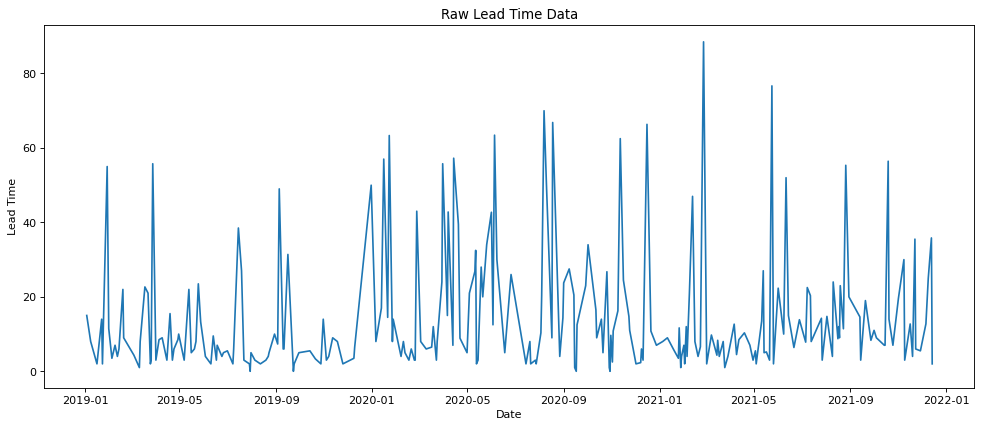

In [7]:
figure(figsize=(15, 6), dpi=80)
sns.lineplot(data=df2,x='ORDERDATE', y='TIMEDIFF')
plt.title("Raw Lead Time Data")
plt.xlabel('Date')
plt.ylabel('Lead Time')

Calculate rolling mean (by quarter) and rolling std deviation

In [8]:
rolling_mean2 = df2.rolling(30).mean()
rolling_std2 = df2.rolling(30).std()

### Plot raw data with rolling mean and rolling std deviation

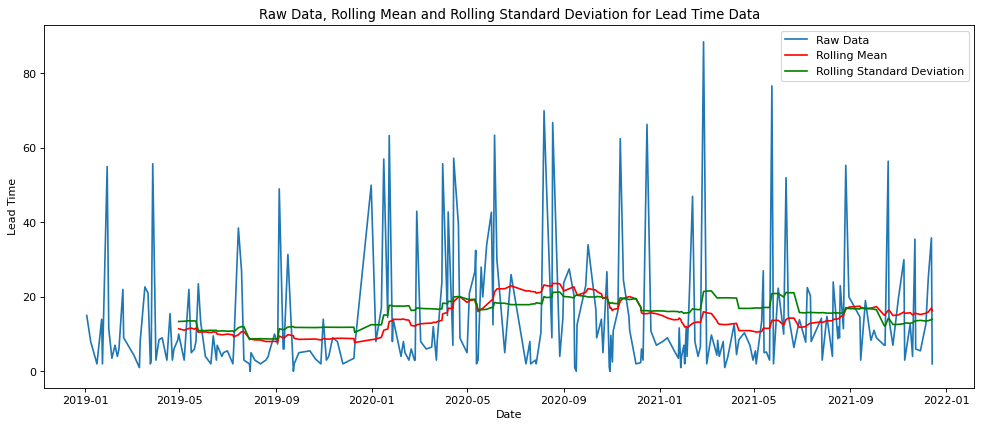

In [9]:
figure(figsize=(15, 6), dpi=80)
plt.plot(df2,label='Raw Data')
plt.plot(rolling_mean2,color='red',label='Rolling Mean')
plt.plot(rolling_std2,color='green',label='Rolling Standard Deviation')
plt.legend()
plt.title("Raw Data, Rolling Mean and Rolling Standard Deviation for Lead Time Data")
plt.ylabel('Lead Time')
plt.xlabel('Date')
plt.show()

### Run augmented Dickey-Fuller test and print the results

In [10]:
adft = adfuller(df2,autolag="AIC")

In [11]:
output_df2 = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df2)

         Values                       Metric
0 -1.502423e+01              Test Statistics
1  1.011898e-27                      p-value
2  0.000000e+00             No. of lags used
3  2.510000e+02  Number of observations used
4 -3.456674e+00          critical value (1%)
5 -2.873125e+00          critical value (5%)
6 -2.572944e+00         critical value (10%)


### Autocorrelation plot

The Autocorrelation plot for the data is:


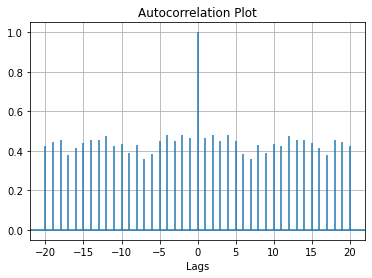

In [12]:
plt.title("Autocorrelation Plot")
plt.xlabel("Lags")
plt.acorr(df2.to_numpy().flatten(), maxlags = 20)
print("The Autocorrelation plot for the data is:")
plt.grid(True)
plt.show()

### Train, test and fit ARIMA model

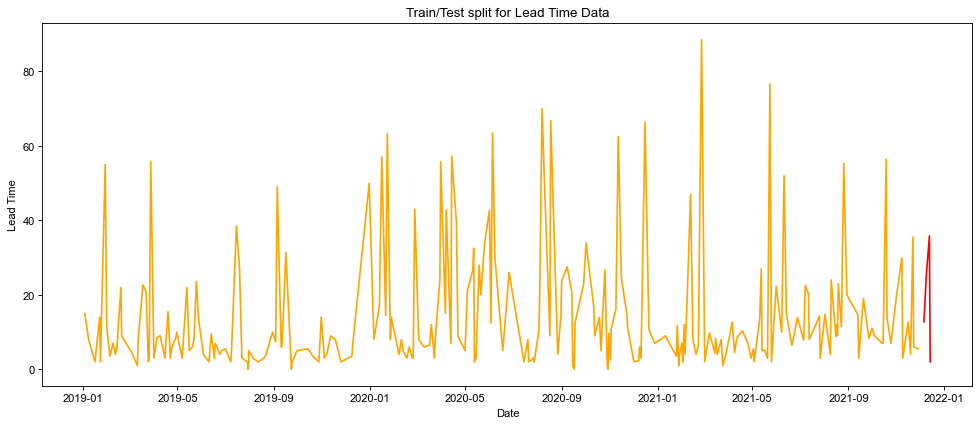

In [13]:
figure(figsize=(15, 6), dpi=80)
df2['ORDERDATE'] = df2.index
train = df2[df2['ORDERDATE'] < pd.to_datetime('2021-12', format='%Y-%m-%d')]
train['train'] = train['TIMEDIFF']
del train['ORDERDATE']
del train['TIMEDIFF']
test = df2[df2['ORDERDATE'] >= pd.to_datetime('2021-12', format='%Y-%m-%d')]
del test['ORDERDATE']
test['test'] = test['TIMEDIFF']
del test['TIMEDIFF']
plt.plot(train, color = 'orange')
plt.plot(test, color = "red")
plt.title("Train/Test split for Lead Time Data")
plt.ylabel("Lead Time")
plt.xlabel('Date')
sns.set()
plt.show()

In [14]:
diff_0 = train.dropna()
print("p-value:", adfuller(diff_0.dropna())[1])

diff_1 = train.diff().dropna()
print("p-value:", adfuller(diff_1.dropna())[1])

diff_2 = train.diff().diff().dropna()
print("p-value:", adfuller(diff_2.dropna())[1])

p-value: 1.5351960590854504e-27
p-value: 3.616208836039668e-12
p-value: 1.0312737321593751e-16


In [15]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

arima_model = arimamodel(train)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2095.046, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2093.116, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2094.524, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2094.606, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2232.418, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.245 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  248
Model:                        SARIMAX   Log Likelihood               -1044.558
Date:                Thu, 20 Oct 2022   AIC                           2093.116
Time:                        16:43:58   BIC                           2100.142
Sample:                             0   HQIC                          2095.944
                                - 248                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.3094      1.925      7.433      0.000      10.536      18.083
sigma2       266.6604     25.880     10.304      0.000     215.936     317.384
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):               330.57
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                             2.05
Prob(H) (two-sided):                  0.14   Kurtosis:                         6.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
arima_model = ARIMA(train, order=(1,0,1))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  train   No. Observations:                  248
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1043.523
Date:                Thu, 20 Oct 2022   AIC                           2095.046
Time:                        16:43:58   BIC                           2109.099
Sample:                             0   HQIC                          2100.703
                                - 248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2987      2.362      6.055      0.000       9.670      18.927
ar.L1          0.6775      0.449      1.508      0.132      -0.203       1.558
ma.L1         -0.6104      0.493     -1.238      0.2

C:\Users\alharrel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alharrel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alharrel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Make predictions

In [17]:
forecast = model.predict(dynamic=False)

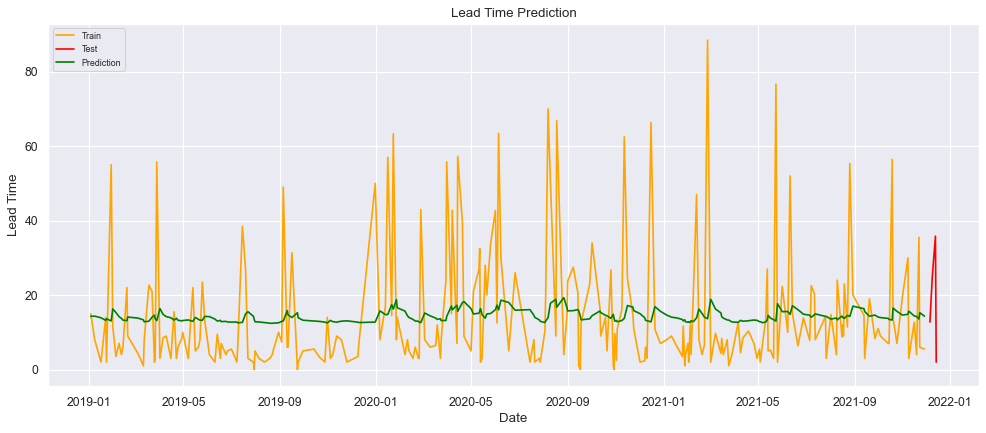

In [18]:
figure(figsize=(15, 6), dpi=80)
plt.plot(train, label='Train', color = 'orange')
plt.plot(test, color = 'red', label='Test')
plt.plot(forecast, color = 'green', label='Prediction')
plt.title('Lead Time Prediction')
plt.xlabel('Date')
plt.ylabel('Lead Time')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Compute RMSE

In [19]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(train,forecast)))

16.261352185416676
